In [1]:
# from utils import *
from fastai2.vision.all import *
from nbdev.showdoc import *
from ipywidgets import widgets
from pandas.api.types import CategoricalDtype

import matplotlib as mpl
# mpl.rcParams['figure.dpi']= 200
mpl.rcParams['savefig.dpi']= 200
mpl.rcParams['font.size']=12

set_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
pd.set_option('display.max_columns',999)
np.set_printoptions(linewidth=200)
torch.set_printoptions(linewidth=200)

from fastai2.vision.widgets import *

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
path = Path('../../rf-chess-data/cropped_v1/')
fns = get_image_files(path)  # works recursively, to each subfolder

# failed = verify_images(fns)

In [4]:
fns[:3]

(#3) [Path('../../rf-chess-data/cropped_v1/02323_white-pawn.jpg'),Path('../../rf-chess-data/cropped_v1/00960_black-rook.jpg'),Path('../../rf-chess-data/cropped_v1/02432_black-rook.jpg')]

##### According to Zach's Tut

In [33]:
path = untar_data(URLs.PETS)

In [37]:
blocks = (ImageBlock, CategoryBlock)
splitter = RandomSplitter(valid_pct=0.2, seed=42)
pat = r'([^/]+)_\d+.*$'
item_tfms = [Resize(224, method='crop')]
batch_tfms=[*aug_transforms(size=256), Normalize.from_stats(*imagenet_stats)]

In [38]:
block = DataBlock(blocks=blocks,
                  get_items=get_image_files,
                  get_y=RegexLabeller(pat),
                  splitter=splitter,
                  item_tfms=item_tfms,
                  batch_tfms=batch_tfms)

In [40]:
type(block)

fastai2.data.block.DataBlock

In [47]:
block.get_y("mymym/pug_119.jpg")

'pug'

In [57]:
p = path

In [59]:
p.name

'cropped_v1'

In [63]:
def piece_class_parse(fn): 
    if isinstance(fn, Path):
        fn = fn.name
    fn = fn.split('_')[1]
    fn = fn.split('.')[0]
    return fn

In [94]:
pieces = DataBlock(
            blocks = (ImageBlock, CategoryBlock),
            get_items = get_image_files,
            splitter = RandomSplitter(valid_pct=0.3, seed=42),
            get_y = piece_class_parse,
            item_tfms = Resize(128)
)

In [95]:
pieces

In [100]:
path = Path('../../rf-chess-data/cropped_v1/')
pieces_dl = pieces.dataloaders(path)

In [101]:
pieces_dl

In [ ]:
dls.valid.show_batch(max_n=4, rows=1)

In [109]:
list(pieces_dl.vocab)

['black-bishop',
 'black-king',
 'black-knight',
 'black-pawn',
 'black-queen',
 'black-rook',
 'white-bishop',
 'white-king',
 'white-knight',
 'white-pawn',
 'white-queen',
 'white-rook']

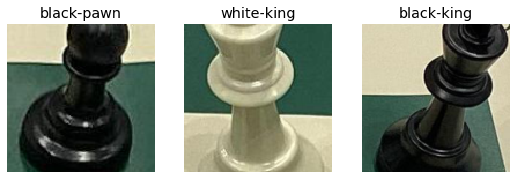

In [113]:
pieces = pieces.new(item_tfms=Resize(size=128, 
                                     method='crop',
                                     resamples=(2, 0)
                                    )
                   )
pieces_dl = pieces.dataloaders(path)
pieces_dl.valid.show_batch(max_n=3)

In [120]:
pieces_dl.transform

(#2) [(#2) [noop: (object,object) -> noop ,PILBase.create: (bytes,object) -> create
(ndarray,object) -> create
(Tensor,object) -> create
(str,object) -> create
(Path,object) -> create ],piece_class_parse: (object,object) -> piece_class_parse ]

In [127]:
b1 = pieces_dl.one_batch()

In [128]:
len(b1)

2

In [132]:
b1[1][0]

tensor(2, device='cuda:0')

In [130]:
len(b1[0]), len(b1[1])

(64, 64)

In [123]:
type(pieces_dl)

fastai2.data.core.DataLoaders

In [122]:
pieces_dl.sho

2009

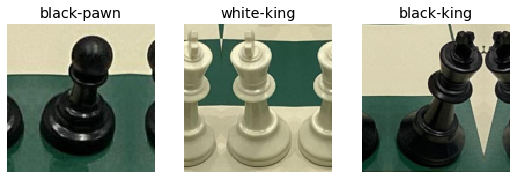

In [102]:
pieces = pieces.new(item_tfms=Resize(size=128, 
                                     method=ResizeMethod.Pad,
                                     pad_mode='zeros',
                                     resamples=(2, 0)
                                     
                                    )
                   )
pieces_dl = pieces.dataloaders(path)
pieces_dl.valid.show_batch(max_n=3)

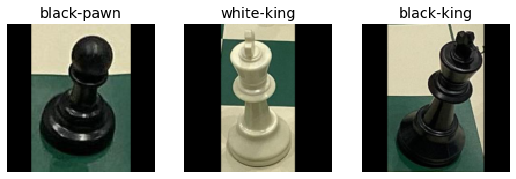

In [103]:
pieces = pieces.new(item_tfms=Resize(128, 
                                     ResizeMethod.Pad,
                                    pad_mode='zeros'
                                    )
                   )
pieces_dl = pieces.dataloaders(path)
pieces_dl.valid.show_batch(max_n=3)

AttributeError: 'DataBlock' object has no attribute 'da'

In [77]:
pieces_dl.show_batch(max_n)

AttributeError: 'DataBlock' object has no attribute 'show_batch'

In [6]:
pieces = ImageDataLoaders.from_name_func(
                path, 
                get_image_files(path),
                valid_pct=0.2, 
                seed=42,
                label_func=piece_class_parse, 
#                 item_tfms=Resize(128),
                item_tfms=RandomResizedCrop(128, min_scale=0.5),
                batch_tfms=aug_transforms(),
                )

In [6]:
pieces = ImageDataLoaders.from_name_func(
                path, 
                get_image_files(path),
                valid_pct=0.2, 
                seed=42,
                label_func=piece_class_parse, 
#                 item_tfms=Resize(128),
                item_tfms=RandomResizedCrop(128, min_scale=0.5),
                batch_tfms=aug_transforms(),
                )

In [7]:
type(pieces)

fastai2.data.core.DataLoaders

In [8]:
pieces.bs

64

In [9]:
pieces.types

(#2) [[<class 'pathlib.PosixPath'>, (<class 'pathlib.Path'>, <class 'str'>, <class 'torch.Tensor'>, <class 'numpy.ndarray'>, <class 'bytes'>), <class 'fastai2.vision.core.PILImage'>],[<class 'pathlib.PosixPath'>, <class 'str'>, <class 'fastai2.torch_core.TensorCategory'>]]

In [27]:
ds = pieces.dataset

In [28]:
type(ds)

fastai2.data.core.Datasets

In [31]:
pieces = ImageDataLoaders.from_name_func(
                path, 
                get_image_files(path),
                valid_pct=0.2, 
                seed=42,
                label_func=piece_class_parse, 
#                 item_tfms=Resize(128),
                item_tfms=RandomResizedCrop(128, min_scale=0.5),
                batch_tfms=aug_transforms(),
                )

In [32]:
type(pieces)

fastai2.data.core.DataLoaders

In [30]:
ds2 = Datasets()

TypeError: 'NoneType' object is not iterable

In [29]:
ds.

['__add__',
 '__addi__',
 '__call__',
 '__class__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delattr__',
 '__delitem__',
 '__delwrap__',
 '__dict__',
 '__dict__',
 '__dir__',
 '__dir__',
 '__doc__',
 '__doc__',
 '__eq__',
 '__eq__',
 '__format__',
 '__format__',
 '__ge__',
 '__ge__',
 '__getattr__',
 '__getattr__',
 '__getattribute__',
 '__getattribute__',
 '__getitem__',
 '__getitem__',
 '__gt__',
 '__gt__',
 '__hash__',
 '__hash__',
 '__init__',
 '__init__',
 '__init_subclass__',
 '__init_subclass__',
 '__invert__',
 '__iter__',
 '__iter__',
 '__le__',
 '__le__',
 '__len__',
 '__len__',
 '__lt__',
 '__lt__',
 '__module__',
 '__module__',
 '__mul__',
 '__ne__',
 '__ne__',
 '__new__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce__',
 '__reduce_ex__',
 '__reduce_ex__',
 '__repr__',
 '__repr__',
 '__setattr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__signature__',
 '__signature__',
 '__sizeof__',
 '__sizeof__',
 '__str__',
 '__str__',
 '__subclasshook__',
 '_

In [25]:
pieces.valid_ds

(#574) [(PILImage mode=RGB size=121x181, TensorCategory(3)),(PILImage mode=RGB size=155x311, TensorCategory(7)),(PILImage mode=RGB size=200x307, TensorCategory(1)),(PILImage mode=RGB size=116x165, TensorCategory(3)),(PILImage mode=RGB size=132x180, TensorCategory(9)),(PILImage mode=RGB size=101x146, TensorCategory(3)),(PILImage mode=RGB size=94x144, TensorCategory(3)),(PILImage mode=RGB size=180x304, TensorCategory(1)),(PILImage mode=RGB size=126x211, TensorCategory(8)),(PILImage mode=RGB size=174x310, TensorCategory(1))...]

In [23]:
pieces.train_ds

(#2296) [(PILImage mode=RGB size=159x236, TensorCategory(2)),(PILImage mode=RGB size=139x174, TensorCategory(9)),(PILImage mode=RGB size=135x183, TensorCategory(8)),(PILImage mode=RGB size=111x168, TensorCategory(3)),(PILImage mode=RGB size=193x246, TensorCategory(2)),(PILImage mode=RGB size=128x185, TensorCategory(11)),(PILImage mode=RGB size=178x209, TensorCategory(8)),(PILImage mode=RGB size=122x156, TensorCategory(9)),(PILImage mode=RGB size=106x156, TensorCategory(9)),(PILImage mode=RGB size=121x201, TensorCategory(2))...]

In [12]:
pieces.c

12

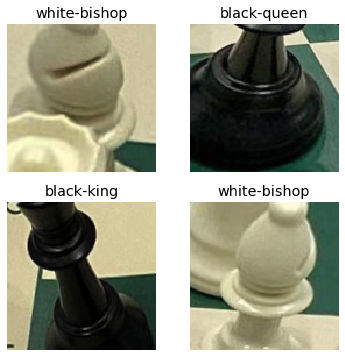

In [7]:
pieces.show_batch(max_n=4)

In [67]:
learn = cnn_learner(pieces, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.592344,0.225219,0.055749,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.331183,0.108400,0.020906,00:05
1,0.232982,0.092184,0.013937,00:05
2,0.173403,0.084749,0.010453,00:05
3,0.145364,0.082581,0.010453,00:05


In [53]:
!pwd

/home/jupyter/my-fastai2-dev/chess-classification-hw


In [58]:
import os

In [68]:
learn.path = Path('/home/jupyter/my-fastai2-dev/chess-classification-hw/')

In [71]:
learn.export(Path('models/standard-piece-2.pkl'))

In [70]:
!ls models

chess1.pkl


In [25]:
!ls -1

bing_search_img.ipynb
class_execercise_1.ipynb
class_execercise_2.ipynb
crop_script_v1.py
data_transform1.ipynb
eda_2.ipynb
meta-data
models
modules
readme.md
Untitled.ipynb


In [36]:
learn.predict('../../rf-chess-data/cropped_v1/00001_black-queen.jpg')

('black-queen',
 tensor(4),
 tensor([9.4498e-06, 6.8743e-04, 6.6458e-08, 2.4124e-07, 9.9929e-01, 1.6199e-06, 9.4365e-07, 6.8985e-06, 2.7374e-08, 5.3158e-10, 6.3544e-06, 2.7342e-07]))

In [27]:
!ls models

chess1.pkl


In [50]:
!ls ../../rf-chess-data/cropped_v1/*.pkl

../../rf-chess-data/cropped_v1/export.pkl
../../rf-chess-data/cropped_v1/standard-piece-2.pkl


In [41]:
learn.path

Path('../../rf-chess-data/cropped_v1')

In [37]:
learn.export('aaa')

In [38]:
!ls

bing_search_img.ipynb	  crop_script_v1.py	 meta-data  readme.md
class_execercise_1.ipynb  data_transform1.ipynb  models     Untitled.ipynb
class_execercise_2.ipynb  eda_2.ipynb		 modules


In [40]:
!ls modules

bingutils.py  misc.py  plotutils.py  __pycache__


In [19]:
# first time
# learn = cnn_learner(pieces, resnet18, metrics=error_rate)
# learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.692937,0.184626,0.047038,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.361239,0.126910,0.031359,00:05
1,0.250677,0.096145,0.019164,00:05
2,0.183771,0.083168,0.010453,00:05
3,0.141690,0.089129,0.012195,00:05


##### Evaluation

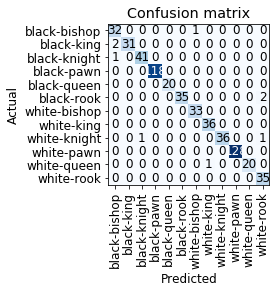

In [9]:
# second time
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

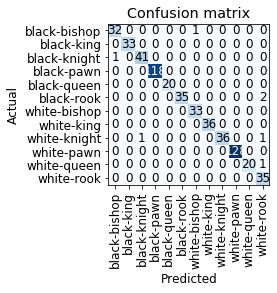

In [20]:
# first time
# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()

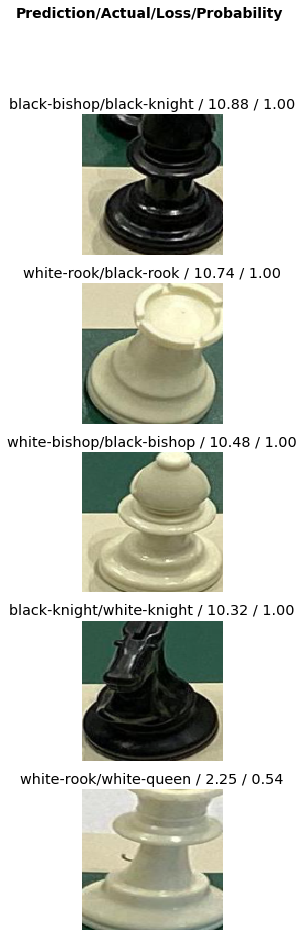

In [21]:
interp.plot_top_losses(5, nrows=5)

In [22]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
cleaner.